# 7506 - Trabajo práctico 1


##### Librerías

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [5]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [6]:
complete_dataset = pd.read_csv("./properati_argentina_2021.csv")
df = complete_dataset.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [7]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [8]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 219428 filas y 20 columnas


In [9]:
df.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
count,199749.000000,199749.000000,0.0,177380.000000,165952.000000,190001.000000,2.031600e+05,2.107530e+05
mean,-34.217279,-59.518381,NaN,3.264449,2.293392,381.145541,2.691529e+03,3.078624e+05
std,3.390056,2.876171,NaN,1.880655,1.587192,3743.776546,4.003007e+05,5.534149e+06
min,-54.832057,-95.712891,NaN,1.000000,-3.000000,10.000000,-3.000000e+00,0.000000e+00
25%,-34.642183,-58.899155,NaN,2.000000,1.000000,50.000000,4.500000e+01,4.300000e+04
50%,-34.585999,-58.485302,NaN,3.000000,2.000000,87.000000,7.600000e+01,9.600000e+04
75%,-34.424623,-58.403779,NaN,4.000000,3.000000,200.000000,1.620000e+02,1.984000e+05
max,42.445407,-35.044991,NaN,40.000000,123.000000,200000.000000,1.128600e+08,1.500000e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219428 entries, 0 to 219427
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        219428 non-null  object 
 1   start_date                219428 non-null  object 
 2   end_date                  219428 non-null  object 
 3   created_on                219428 non-null  object 
 4   latitud                   199749 non-null  float64
 5   longitud                  199749 non-null  float64
 6   place_l2                  219428 non-null  object 
 7   place_l3                  208756 non-null  object 
 8   place_l4                  65303 non-null   object 
 9   place_l5                  1100 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 219428 non-null  object 
 12  property_type             219428 non-null  object 
 13  property_rooms            177380 non-null  f

In [11]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

## Filtrado inicial del Dataset
Como trabajaremos con un universo acotado de propiedades, haremos una selección inicial de las publicaciones que nos interesa analizar:

Como primer paso hay que filtrar las observaciones que su tipo de vivienda sea: Casa, PH o Departamento.

Luego filtramos la ubicacion quedandonos unicamente con las propiedades de Capital Federal.

A continuación, consideraremos solo las que esten cotizadas en dolares.

Y finalmente, tomamos solo las que sean ventas

In [12]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]]

,place_l2,place_l3,property_currency,property_type,operation
25,Capital Federal,NaN,USD,Casa,Venta
42,Capital Federal,Boca,USD,Departamento,Venta
43,Capital Federal,Boca,USD,Departamento,Venta
49,Capital Federal,Once,USD,Departamento,Venta
51,Capital Federal,Boedo,USD,PH,Venta
...,...,...,...,...,...
219210,Capital Federal,Boedo,USD,Casa,Venta
219211,Capital Federal,Boedo,USD,Casa,Venta
219288,Capital Federal,Almagro,USD,Casa,Venta
219349,Capital Federal,Caballito,USD,Casa,Venta


A partir de aquí trabajaremos con el dataset filtrado (`ds_filtrado`)

Analizando los tipos de dato de los campos:
- Hay 3 campos de fecha, evaluaremos más adelante como tratarlos.
- Tenemos latitud y longitd en su formato correcto
- Hay una variable place_l6 que no debería ser un número, también analizaremos a que se debe.
- La cantidad de habitaciones (rooms y bedrooms) quizás debería tener valores enteros.
- El precio tiene un tipo correcto

## Exploración Inicial

### Tipos de variable

In [13]:
# TODO: Tipos de variables

# Categoricas o Cuantitivas
    # Fechas -> Start Date y End Date
    # Places -> l2, l3, l4, l5, l6
    # Operacion
    # Tipo de Propiedad
    # Currency
    # Property Title

# Cuasicuantitativas u ordinales

# Cuantitativas discretas
    # Rooms
    # Bedrooms
    # Surface -> Total y Covered
    # Price

# Cuantitativas continuas
    # Latitud y Longitud
    
# Que es el id y created on?

categoricas = ['start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered']
cuantitativas_continuas = ['latitud', 'longitud']
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': [], 'Cuantitativas Discretas': cuantitativas_discretas, 'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

tipos_de_variable

{'Categoricas': ['id',
  'created_on',
  'start_date',
  'end_date',
  'place_l2',
  'place_l3',
  'place_l4',
  'place_l5',
  'place_l6',
  'operation',
  'property_type',
  'property_currency',
  'property_title'],
 'Ordinales': [],
 'Cuantitativas Discretas': ['property_rooms',
  'property_bedrooms',
  'property_surface_total',
  'property_surface_covered'],
 'Cuantitativas Continuas': ['property_rooms',
  'property_bedrooms',
  'property_surface_total',
  'property_surface_covered']}

### Fechas


In [14]:
ds_filtrado[["start_date", "end_date", "created_on"]].isna().sum()

start_date    0
end_date      0
created_on    0
dtype: int64

In [15]:
ds_filtrado["start_date"].value_counts()

2021-08-03    836
2021-04-30    815
2021-12-07    778
2021-02-08    645
2021-03-26    565
             ... 
2021-12-26     18
2021-11-21     18
2021-10-23     18
2021-12-19     13
2021-11-27      1
Name: start_date, Length: 204, dtype: int64

In [16]:
ds_filtrado["end_date"].value_counts()

2021-06-05    6411
2022-01-27    5107
9999-12-31    2632
2022-02-09    2155
2021-04-15    1054
              ... 
2022-05-09       1
2021-02-06       1
2022-03-02       1
2021-01-23       1
2022-08-16       1
Name: end_date, Length: 581, dtype: int64

In [17]:
ds_filtrado["created_on"].value_counts()

2021-08-03    836
2021-04-30    815
2021-12-07    778
2021-02-08    645
2021-03-26    565
             ... 
2021-12-26     18
2021-11-21     18
2021-10-23     18
2021-12-19     13
2021-11-27      1
Name: created_on, Length: 204, dtype: int64

Hay un valor extraño en end_date, la fecha 9999-12-31, hay 5041 apariciones de esta fecha

In [18]:
ds_filtrado[ds_filtrado.end_date == '9999-12-31']['start_date'].value_counts()

2021-02-09    132
2021-06-24    122
2021-02-17     67
2021-07-06     66
2021-08-06     64
             ... 
2021-05-29      1
2021-11-14      1
2021-04-04      1
2021-05-23      1
2021-09-09      1
Name: start_date, Length: 162, dtype: int64

Considerando que todas las fechas son de 2021, y que el dato que falta es el del fin de la publicación (es decir, la casa esta publicada) y a fines de preservar estos datos, traeremos a consideración la duración promedio de cada publicación, calcularemos ese promedio dejando fuera los 5041 casos que presentan la fecha inválida.

Tomaremos para el cálculo las fechas convertidas a datetime.

In [19]:
dias = pd.to_datetime(ds_filtrado[ds_filtrado.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_filtrado[ds_filtrado.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         42287
mean     73 days 19:43:47.105256935
std      85 days 17:40:07.091661765
min                 0 days 00:00:00
25%                14 days 00:00:00
50%                46 days 00:00:00
75%               100 days 00:00:00
max               611 days 00:00:00
dtype: object

El promedio de la duración de las publicaciones es casi de 75 días, asumiremos que las publicaciones con la fecha invalida duraron lo mismo que el promedio y tomaremos como fecha final la fecha de inicio + 75 días.

In [20]:
ds_filtrado.loc[ds_filtrado.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_filtrado[ds_filtrado.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_filtrado.end_date

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


25                           2021-09-26
42                           2021-09-26
43                           2021-09-28
49                           2022-01-05
51                           2022-03-09
                      ...              
219210                       2022-04-20
219211                       2022-05-05
219288                       2022-04-20
219349                       2022-04-20
219351    2022-01-04 19:43:47.105256935
Name: end_date, Length: 44919, dtype: object

Finalmente, como todos los valores son formatos válidos de fecha, podemos convertir sin problemas.

### Conversion tipo de dato

In [21]:
new_ds = ds_filtrado.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True, errors = 'coerce')
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True, errors = 'coerce')
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True, errors = 'coerce')
ds_filtrado = new_ds.copy()
ds_filtrado.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

## Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda

In [22]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
description_quantitatives = ds_filtrado[cuantitativas].describe()

quantitative_mode = ds_filtrado[cuantitativas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

quantitative_median = ds_filtrado[cuantitativas].median()
quantitative_median.rename("median", inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_median,
                                                             ignore_index=False)
description_quantitatives

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,latitud,longitud
count,44389.000000,39603.000000,42587.000000,43187.000000,43033.000000,43033.000000
mean,2.810449,2.012070,104.705474,89.960474,-34.589199,-58.454395
std,1.438358,1.176533,929.709780,1202.823591,0.196389,0.338157
min,1.000000,1.000000,10.000000,1.000000,-41.168947,-71.471192
25%,2.000000,1.000000,45.000000,40.000000,-34.616005,-58.466523
50%,3.000000,2.000000,65.000000,57.000000,-34.595763,-58.438874
75%,4.000000,3.000000,104.000000,88.000000,-34.577358,-58.408848
max,36.000000,70.000000,137000.000000,217000.000000,-24.770804,-55.496357
mode,2.000000,1.000000,50.000000,40.000000,-34.604538,-58.424956
median,3.000000,2.000000,65.000000,57.000000,-34.595763,-58.438874


## Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.

In [23]:
qualitative_dataset = ds_filtrado[categoricas]
dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

,id
CyZu6IaZgmQYGk8jmPajCg==,1
GAzTETse7f4lOdVxmK6Icw==,1
imnxu/53ZTEUDF6B3FVaAg==,1
j0hDCjE7b1FrWqKVQCFP/A==,1
iZny9vKBECxrkIWfJdtsqw==,1
,created_on
2021-08-03 00:00:00,836
2021-04-30 00:00:00,815
2021-12-07 00:00:00,778
2021-02-08 00:00:00,645


La tabla muestra varias cosas:
- Hay 94249 propiedades habiendo filtrado solo las de Capital Federal, Venta y USD
- Hay 80829 departamentos, 9266 PHs y 4154 casas
- Hay 14308 propiedades en Palermo
- El id de la propiedad es único y no representa nada útil para nuestro procesamiento. Parecería pasar algo similar con el título, lo analizaremos en más detalle más adelante

## Correlación entre variables

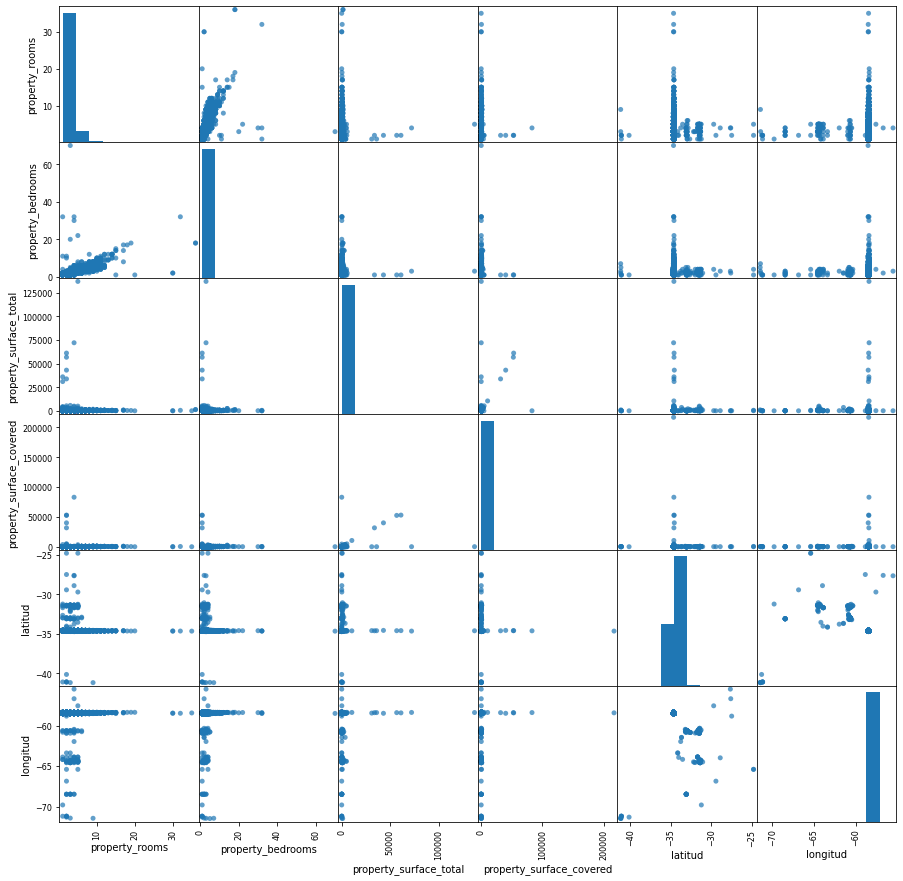

In [24]:
# Realizar un análisis gráfico de las distribuciones de las variables
columns = description_quantitatives.columns.tolist()
quantitative_dataset = ds_filtrado[columns]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

In [25]:
# Analizar las correlaciones existentes entre las variables.
quantitative_dataset.corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,latitud,longitud
property_rooms,1.000000,0.837938,0.065451,0.081500,0.010577,-0.012234
property_bedrooms,0.837938,1.000000,0.061415,0.090079,0.005715,-0.011442
property_surface_total,0.065451,0.061415,1.000000,0.394419,0.018303,-0.017648
property_surface_covered,0.081500,0.090079,0.394419,1.000000,0.002297,-0.001418
latitud,0.010577,0.005715,0.018303,0.002297,1.000000,-0.288476
longitud,-0.012234,-0.011442,-0.017648,-0.001418,-0.288476,1.000000


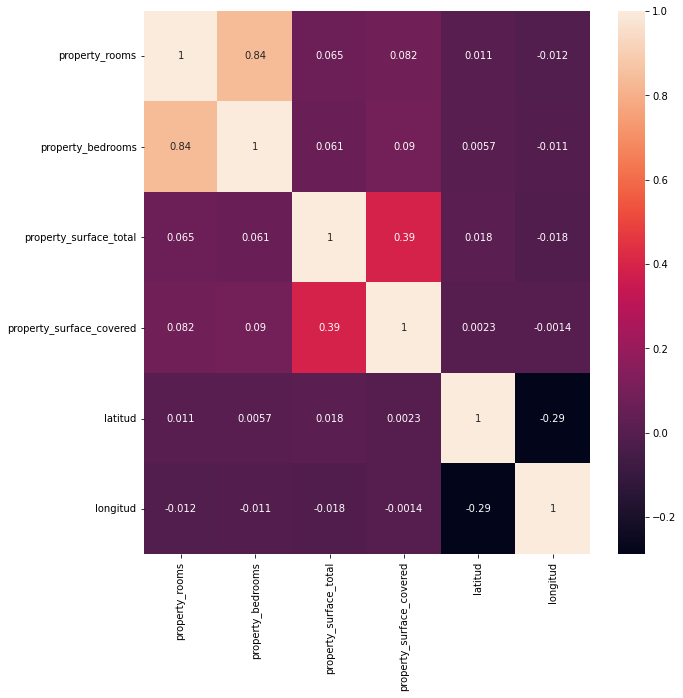

In [26]:
# Analizar las correlaciones existentes entre las variables.
plt.figure(figsize=(10, 10))
sns.heatmap(quantitative_dataset.corr(), annot=True)

## Análisis de valores faltantes

Ahora analizaremos los datos faltantes del dataset.

### Porcentaje de valores faltantes por columna



id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       4.198669
longitud                      4.198669
place_l2                      0.000000
place_l3                      0.569915
place_l4                     96.095194
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.179902
property_bedrooms            11.834636
property_surface_total        5.191567
property_surface_covered      3.855829
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


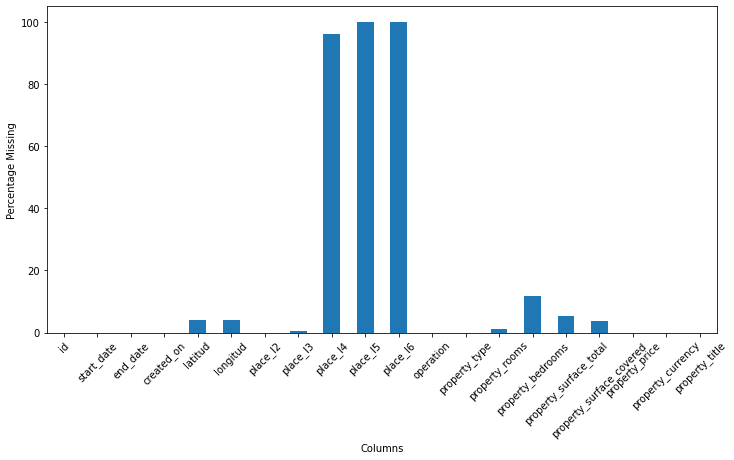

In [27]:
# Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
# el porcentaje de datos faltantes con respecto al total del dataset

percent_missing = ds_filtrado.isna().sum() * 100 / len(ds_filtrado)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_filtrado.shape[0]
print(ds_filtrado.isna().sum() / rows * 100)

A simple vista podemos ver que las columnas place_l4,place_l5 y place_l6 practicamente no tienen datos, procederemos a eliminarlas.

### Porcentaje de datos faltantes por fila

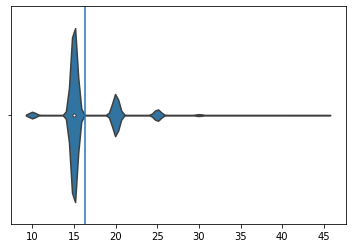

In [28]:
column_count = ds_filtrado.shape[1]
ds_plot = ds_filtrado.T.isna().sum() * 100 / column_count

fig, ax = plt.subplots()

sns.violinplot(ds_plot, ax=ax)
plt.axvline(ds_plot.mean())

Analizaremos nuevamente el porcentaje por fila luego de trabajar con las columnas

### Procesado de columnas

Descartaremos la columna id debido a que no es relevante para nuestro análisis. (Tendriamos que explicar por qué)

In [29]:
ds_filtrado['id'].head()

25    CyZu6IaZgmQYGk8jmPajCg==
42    d3Z0MblSb2IMBoOBMGJEEQ==
43    rL7qPkQnomsMGu2ViS3sBw==
49    vuX/ccLAMVml4qWRFcOJUA==
51    ZTtSCeqZ3HUgf5jjwEzRcw==
Name: id, dtype: object

Como mencionamos anteriormente, evaluaremos descartar place_l4 por la cantidad de valores faltantes que hay.

In [30]:
ds_filtrado['place_l4'].value_counts()

Palermo Hollywood    762
Palermo Chico        544
Palermo Soho         363
Palermo Viejo         85
Name: place_l4, dtype: int64

Como son pocas observaciones y todas corresponden al barrio de Palermo, descartaremos esta columna.

In [31]:
properties_dataset = ds_filtrado.drop(axis="columns", columns=["id", "place_l4", "place_l5", "place_l6"]).copy()
properties_dataset.columns.tolist()

['start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

### Analisis de faltantes por fila

Ahora que nos quedamos solo con las columnas deseadas, analizaremos nuevamente los datos faltantes por fila.

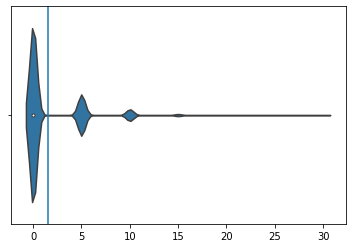

In [32]:
column_count = ds_filtrado.shape[1]
ds_plot = properties_dataset.T.isna().sum() * 100 / column_count

sns.violinplot(ds_plot)
plt.axvline(ds_plot.mean())

Como podemos ver en el gráfico, la cantidad de datos faltantes bajó muchísimo al eliminar las columnas. Tenemos algunos registros con 5 o 10% de datos faltantes, veremos que falta

In [33]:
properties_dataset['row_missing_data'] = properties_dataset.T.isna().sum() * 100 / column_count
properties_dataset['row_missing_data'].value_counts()

0.0     34353
5.0      7835
10.0     2226
15.0      408
20.0       59
25.0       37
30.0        1
Name: row_missing_data, dtype: int64

In [34]:
dataset_perc = properties_dataset['row_missing_data'].value_counts() * 100 / properties_dataset.shape[0]
print(f"La cantidad de faltantes segun porcentaje representan\n{dataset_perc}")

La cantidad de faltantes segun porcentaje representan
0.0     76.477660
5.0     17.442508
10.0     4.955587
15.0     0.908302
20.0     0.131348
25.0     0.082370
30.0     0.002226
Name: row_missing_data, dtype: float64


In [35]:
properties_dataset.groupby('row_missing_data').get_group(5).isna().sum()

start_date                     0
end_date                       0
created_on                     0
latitud                        0
longitud                       0
place_l2                       0
place_l3                      92
operation                      0
property_type                  0
property_rooms               178
property_bedrooms           4367
property_surface_total      1857
property_surface_covered    1341
property_price                 0
property_currency              0
property_title                 0
row_missing_data               0
dtype: int64

In [36]:
properties_dataset.groupby('row_missing_data').get_group(10).isna().sum()

start_date                     0
end_date                       0
created_on                     0
latitud                     1459
longitud                    1459
place_l2                       0
place_l3                      61
operation                      0
property_type                  0
property_rooms               233
property_bedrooms            660
property_surface_total       311
property_surface_covered     269
property_price                 0
property_currency              0
property_title                 0
row_missing_data               0
dtype: int64

Text(0, 0.5, 'Updated Percentage Missing')

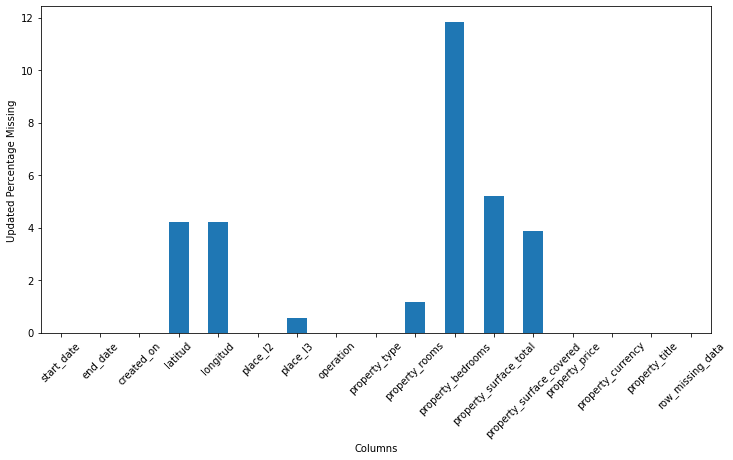

In [37]:
ds_filtrado.property_bedrooms.dropna(inplace=True)
ds_filtrado.property_rooms.dropna(inplace=True)
percent_missing = properties_dataset.isna().sum() * 100 / len(ds_filtrado)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Updated Percentage Missing")
# Entender bien que datos estan faltando, yo encontre varios N/A y trate de eliminarlos pero no estoy viendo el cambio todavia

# Miren esto:

#for x in ds_filtrado.property_rooms:
#    print(x)

# TODO: Decidir que hacer con estos grupos, creo que lo mejor es ignorarlos y ya. Al de 10% le falta la latitud y la longitud

## Graficos


## Limpieza

## Graficos
